# Session 10: Cluster Analysis

Instruction for using Colab: [Here](https://www.tutorialspoint.com/google_colab/google_colab_quick_guide.htm)

## Generating Data

First, we will use a really easy example to test our algorithm implementation. Our data is data points sampled from two different bivariate normal distributions. For a given data point, we will hide its label (in other word, its original distribution). By using kmeans, we are hoping to be able to cluster these points with an interesting pattern.

**More on Customizing matplotlib** <br>
Using style sheets
The style package adds support for easy-to-switch plotting “styles” with the same parameters as a matplotlibrc file (which is read at startup to configure matplotlib).

There are a number of pre-defined styles provided by matplotlib. For example, there’s a pre-defined style called “ggplot”, which emulates the aesthetics of <span style="color:blue"> ggplot </span> (a popular plotting package for R). To use this style, just add:

```python
import matplotlib.pyplot as plt
plt.style.use('ggplot')
```
To list all available styles, use:
```python
print(plt.style.available)
```
For more details go to <https://matplotlib.org/users/customizing.html>.
For a list of markers available for the argument <tt>scatter:marker</tt>: <https://matplotlib.org/api/markers_api.html#module-matplotlib.markers>.
You can play around with arguments of the `matplotlib.scatter` function to master it. For example

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import collections
import glob
import pprint
import pandas as pd
from sklearn.cluster import KMeans
# Customizing matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

In [2]:
# Parameters of the simulated mutivariate gaussian distribution
mean_d1 = [0, 0]
mean_d2 = [5, 5]
cov = [[1, 0], [0, 1]]
x1, y1 = np.random.multivariate_normal(mean_d1, cov, 5000).T
x2, y2 = np.random.multivariate_normal(mean_d2, cov, 5000).T
color = np.array(["red" for i in range(5000)]+["blue" for i in range(5000)])

# Hide our labels
x = np.concatenate((x1,x2),axis=0)
y = np.concatenate((y1,y2),axis=0)

In [3]:
x.shape

(10000,)

In [13]:
#added by Sam - 16-JUL-2024
print(x1.shape, x2.shape, y1.shape, y2.shape, y.shape)

(5000,) (5000,) (5000,) (5000,) (10000,)


In [14]:
data = pd.DataFrame(data=np.hstack((x.reshape(-1,1), y.reshape(-1,1))),columns=['x','y'])

In [17]:
#added by Sam - 16-JUL-2024
print("data.info():", data.info())
print("=======================================")
print("data.shape:", data.shape)
print("=======================================")
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB
data.info(): None
data.shape: (10000, 2)


,x,y
0,0.182991,1.226414
1,1.165196,0.466897
2,-0.762997,0.581332
3,-2.489617,-0.675330
4,-1.769719,0.805049


Text(0, 0.5, 'y')

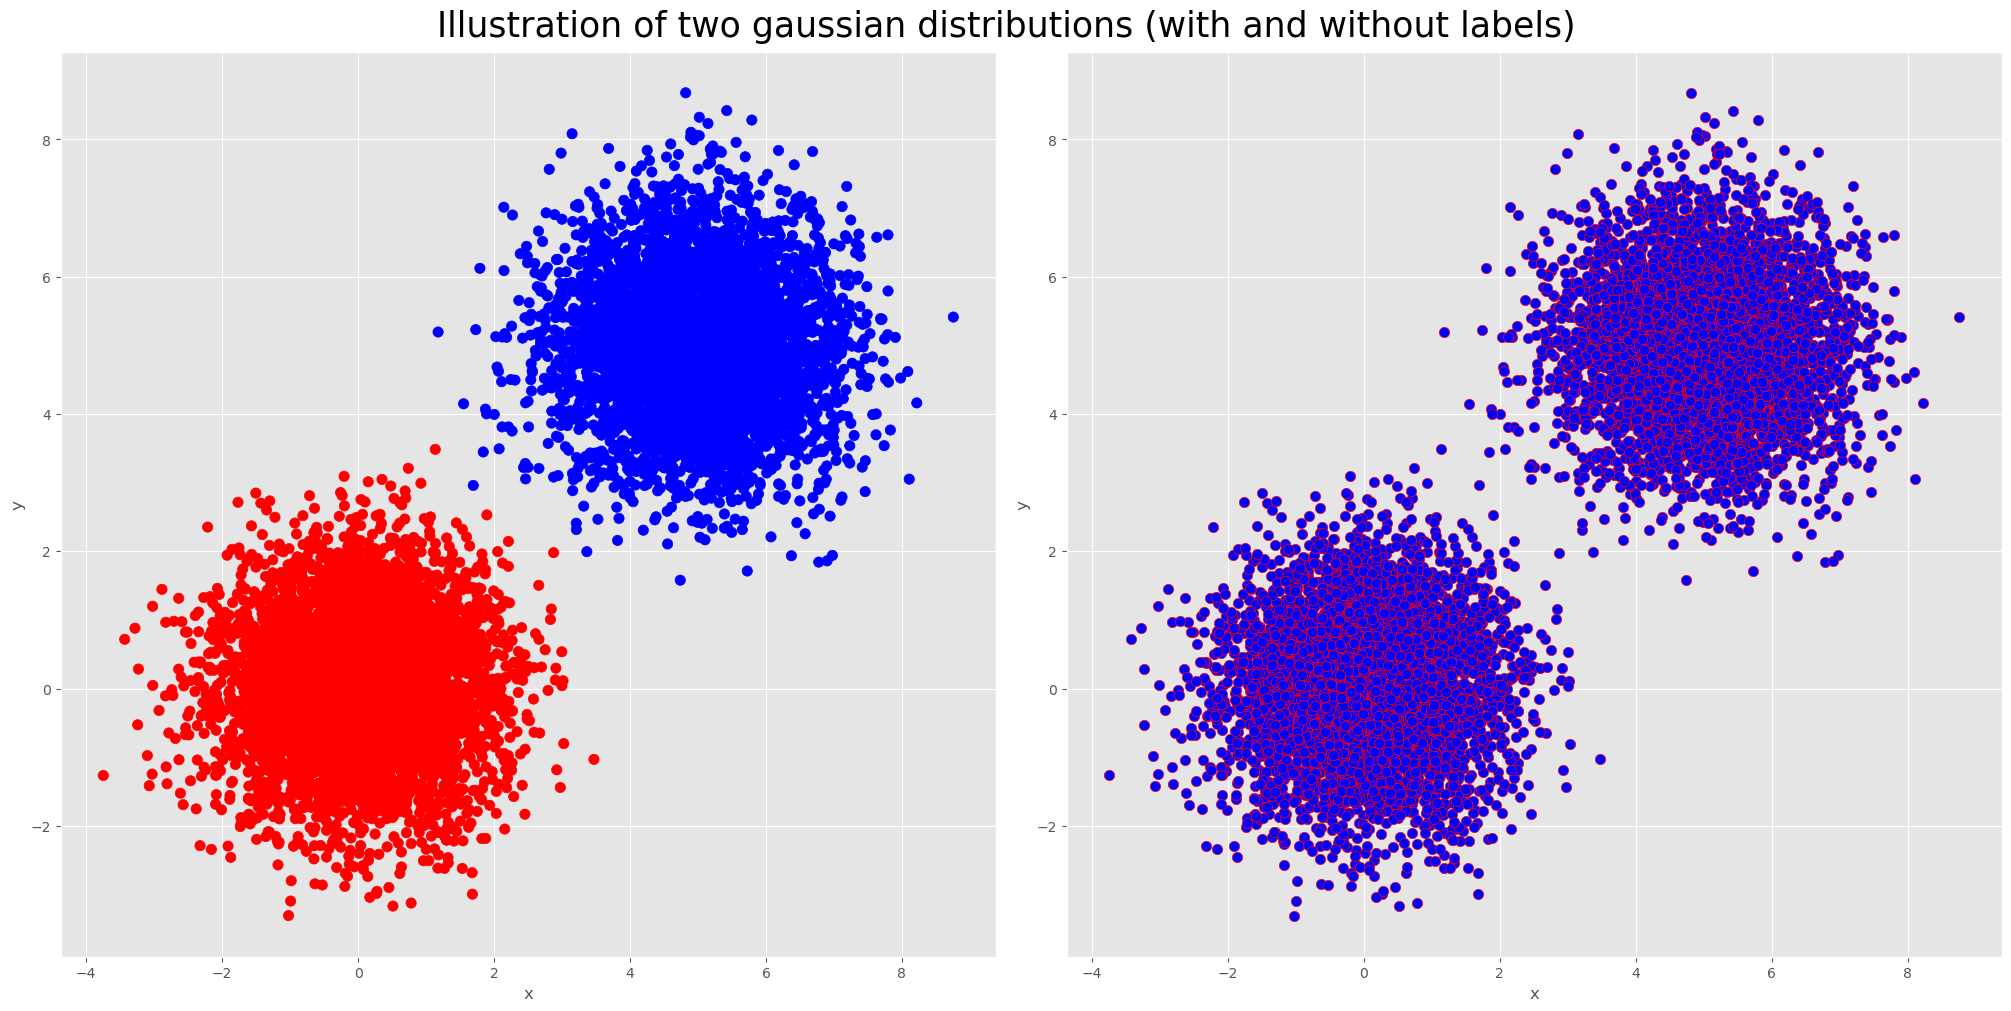

In [15]:
# Plot
fig, axs = plt.subplots(1, 2, constrained_layout=True)
axs[0].scatter([x1,x2], [y1,y2],color=color,s=220, marker=".")
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.suptitle('Illustration of two gaussian distributions (with and without labels)', fontsize=25)

axs[1].scatter(x,y, c="blue", s=220, marker=".", edgecolors = "red")
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

In [16]:
# Number of clusters
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(data)
# Getting the cluster labels
labels = kmeans.predict(data)
print('The labels associated with the observations are:', labels)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print('The centroids associated with the clusters are:', centroids) # From sci-kit learn

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The labels associated with the observations are: [0 0 0 ... 1 1 1]
The centroids associated with the clusters are: [[0.01487295 0.01207715]
 [4.99704186 5.00585764]]


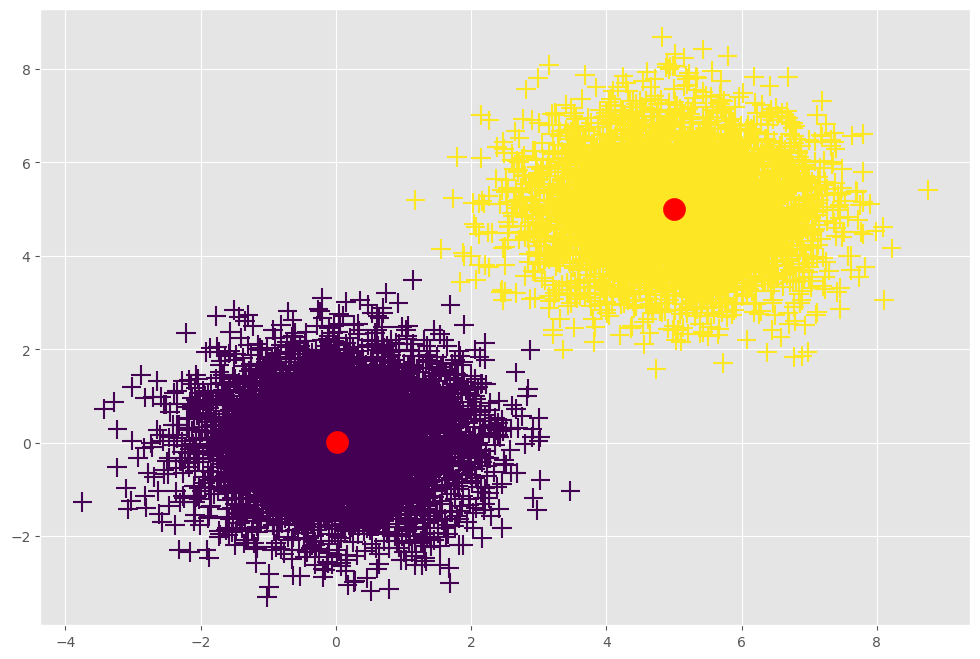

In [18]:
figsize = plt.figure(figsize = (12,8))
plot = plt.scatter(x, y, c= labels, s=200, marker = "+")
plot = plt.scatter(centroids[:,0], centroids[:,1], c='red', s=1000, marker = ".") # marker: shape of points

## Hierarchical Clustering via Scikit-Learn

### Example 1

#### Preparation

+ Loading Required Libraries
+ Preparing Notebook
+ Generating Data

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering

# from sklearn.cluster import KMeans       # ----> for k-means

from sklearn.datasets import make_blobs    # ----> for data generation

# Creating a sample dataset with k clusters and Dim demensions
k_true = 4
Dim = 3
X, y = make_blobs(n_samples=800, n_features = Dim, centers = k_true)

plt.rcParams['figure.figsize'] = (12, 8)

#### Raw Data Visualization

In [20]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

<Figure size 1200x800 with 0 Axes>

Next, we need to decide the number of clusters that we want our data to be split to. To this end, we will use the ```scipy``` library to create a dendrogram. Then, base on the dendrogram we choose the number of clusters.

#### Building Dendrogram

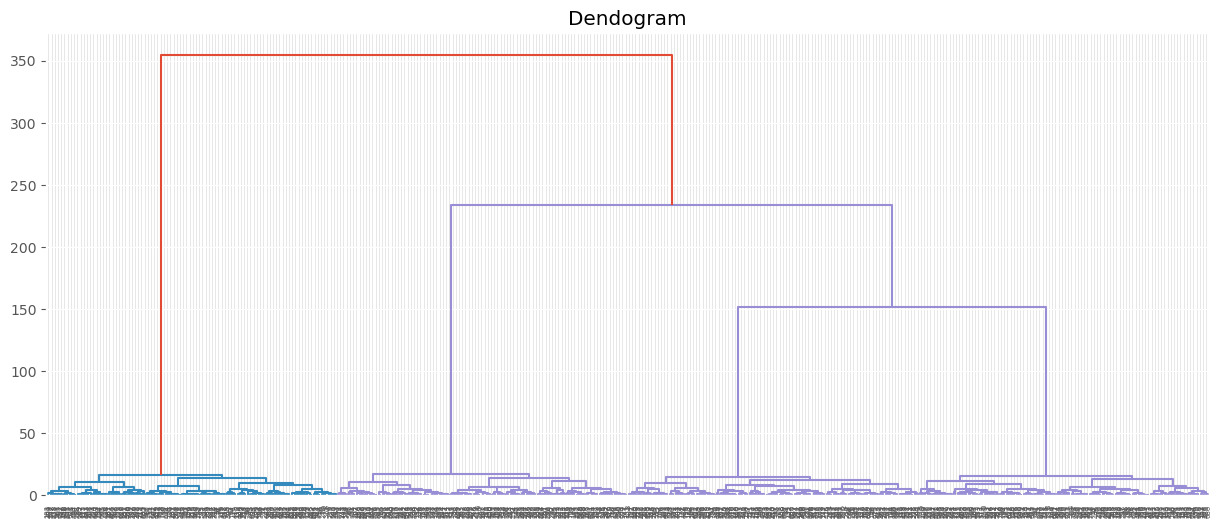

In [21]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 6))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

Z: [idx1, idx2, dist, sample_count]

In [23]:
Z = shc.linkage(X, method='ward')

In [24]:
Z[0]

array([1.64000000e+02, 5.86000000e+02, 7.14339014e-02, 2.00000000e+00])

In [25]:
Z[20:40]

array([[2.98000000e+02, 6.66000000e+02, 1.46606010e-01, 2.00000000e+00],
       [8.80000000e+01, 6.69000000e+02, 1.48081185e-01, 2.00000000e+00],
       [3.88000000e+02, 5.83000000e+02, 1.48778117e-01, 2.00000000e+00],
       [3.55000000e+02, 5.89000000e+02, 1.52284147e-01, 2.00000000e+00],
       [3.63000000e+02, 6.18000000e+02, 1.55528618e-01, 2.00000000e+00],
       [1.70000000e+02, 6.64000000e+02, 1.57022667e-01, 2.00000000e+00],
       [2.04000000e+02, 5.02000000e+02, 1.57632753e-01, 2.00000000e+00],
       [3.90000000e+01, 1.33000000e+02, 1.57787661e-01, 2.00000000e+00],
       [7.00000000e+00, 7.29000000e+02, 1.58869918e-01, 2.00000000e+00],
       [1.95000000e+02, 3.16000000e+02, 1.59375570e-01, 2.00000000e+00],
       [2.64000000e+02, 5.67000000e+02, 1.62826766e-01, 2.00000000e+00],
       [4.10000000e+01, 4.46000000e+02, 1.63846140e-01, 2.00000000e+00],
       [7.52000000e+02, 8.04000000e+02, 1.65243911e-01, 3.00000000e+00],
       [2.00000000e+01, 2.88000000e+02, 1.66805161e

In [26]:
Z[-8:]

array([[1576.        , 1583.        ,   14.17994814,  132.        ],
       [1582.        , 1588.        ,   14.57613832,  200.        ],
       [1586.        , 1589.        ,   15.68005084,  200.        ],
       [1585.        , 1591.        ,   16.48826321,  200.        ],
       [1584.        , 1590.        ,   16.84137574,  200.        ],
       [1592.        , 1593.        ,  151.29496886,  400.        ],
       [1595.        , 1596.        ,  234.17952617,  600.        ],
       [1594.        , 1597.        ,  354.53351512,  800.        ]])

**Ward's method** <br>
In hierarchical cluster analysis, *Ward's method* or *Ward's minimum variance method* is a special case of the **objective function approach** originally presented by Joe H. Ward, Jr. <br>
Ward's minimum variance criterion **minimizes the total within-cluster variance**. In other words, at each step it finds the pair of clusters that leads to minimum increase in total within-cluster variance after merging.

This objective function could be "any function that reflects the investigator's purpose". To illustrate the procedure, Ward used the example where the objective function is the **error sum of squares**, and this example is known as Ward's method or more precisely Ward's minimum variance method.

Now, draw a horizontal line that passes through longest vertical line without a horizontal line:

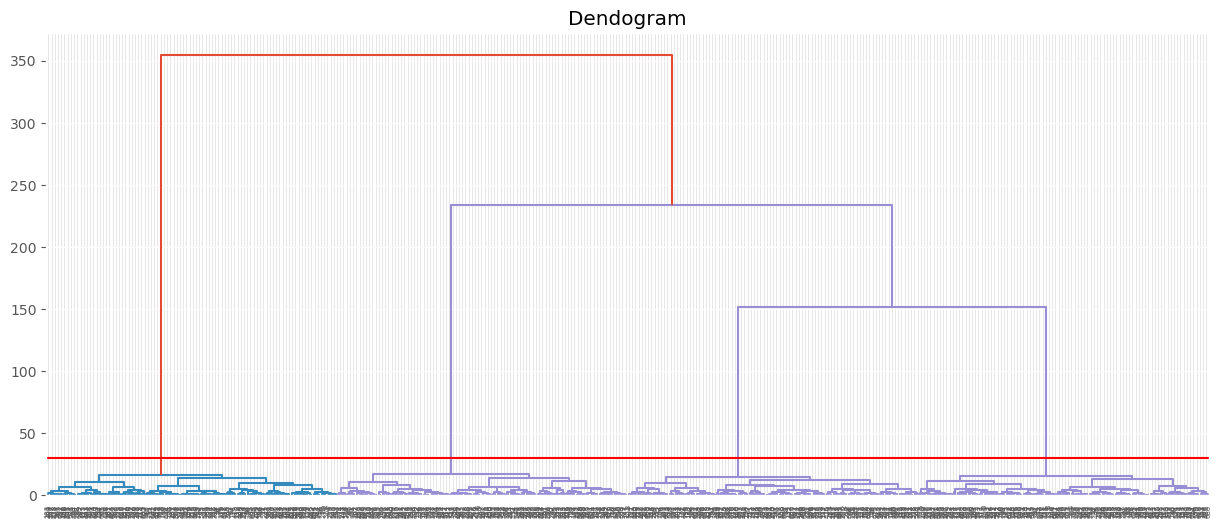

In [32]:
plt.figure(figsize=(15, 6))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=30, color='r', linestyle='-')

Number of clusters according to the above figure will be $4$. The next step is to use the `AgglomerativeClustering` class of the `sklearn.cluster library` to assign each point to a cluster:

In [34]:
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
cluster.fit(X)
labels = cluster.fit_predict(X)
labels[0:10]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 3, 3, 3, 2, 2, 0, 1, 2, 1], dtype=int64)

**`AgglomerativeClustering` Linkage Parameter:** <br>
linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

ward minimizes the variance of the clusters being merged.
average uses the average of the distances of each observation of the two sets.
complete or maximum linkage uses the maximum distances between all observations of the two sets.
single uses the minimum of the distances between all observations of the two sets.

In [35]:
fig = plt.figure()
ax = Axes3D(fig)
scatt = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)

<Figure size 1200x800 with 0 Axes>

### Choosing the Value of $K$

In many cases the value of $K$ may be known a priori. If not, one can use the so-called **Elbow Method**.

The KElbowVisualizer implements the “elbow” method to help select the optimal number of clusters by fitting the model with a range of values for $K$. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

To demonstrate, in the following example the KElbowVisualizer fits the KMeans model for a range of K values from $4$ to $11$ on a sample two-dimensional dataset with $8$ random clusters of points. When the model is fit with $8$ clusters, we can see a line annotating the “elbow” in the graph, which in this case we know to be the optimal number.

In [37]:
! pip install yellowbrick

ERROR: Could not find a version that satisfies the requirement yellowbrick (from versions: none)
ERROR: No matching distribution found for yellowbrick


Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/yellowbrick/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/yellowbrick/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)'))) - skipping


In [38]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

# metric='calinski_harabasz'

It is important to remember that the “elbow” method does not work well if the data is not very clustered. In this case, you might see a smooth curve and the optimal value of $K$ will be unclear.

As we have seen, Kmeans and hierarchical clustering use distance-based clustering algorithms.

Since these algorithms all use norm-based such as Euclidean distance function, they are not good for clustering categorical data. so, in order to cluster non-numerical data using these methods, we have to use other distance functions.

## Handling Mixed data

* Grower Distance

In [ ]:
# data_full = pd.read_csv('mushrooms.csv')
data_full = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRgCz5MNH0G-shFP-vnAyDhp7c6H5U8XcRYK16rAfErKJi91Osf4TJ0rkTg3rJtJgiJrDZA_j9AKFtr/pub?gid=1450418726&single=true&output=csv')
data_full.head()

In [ ]:
data_no_target = data_full.drop(['class'],axis=1)
data_no_target.shape

In [ ]:
data_no_target.dtypes

In [ ]:
data_no_target.shape

22 categorical columns

In [ ]:
data_no_target.nunique()


In [ ]:
## remove veil-type - same value in all records
data_categorical = data_no_target.drop(['veil-type'], axis=1)


Gower Distance is a distance measure that can be used to calculate distance between two entity whose attribute has a mixed of categorical and numerical values.

In [ ]:
## grower distance missing from sklearn -- self install package
!pip install gower


In [ ]:
import gower


In [ ]:
distance_matrix = gower.gower_matrix(data_categorical)

distance_matrix.shape

What does this matrix represent?


In [ ]:
distance_matrix[0, 0:5]

In [ ]:
model = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='precomputed')

In [ ]:
clusters = model.fit_predict(distance_matrix)
clusters[:5]

In [ ]:
data_full['cluster_predictions'] = clusters


We have the true labels, so we can compare how well our clustering capture the true labels

[rand-index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html)

RI = (number of agreeing pairs) / (number of pairs)

In [ ]:
# Rand Index
from sklearn.metrics.cluster import rand_score

In [ ]:
data_full['class'].value_counts()

p : poisonous --> 1

e: edible --> 0

In [ ]:
# Encode labels
from sklearn import preprocessing

In [ ]:
encoder = preprocessing.LabelEncoder()
data_full['target'] = encoder.fit_transform(data_full['class'])
data_full['target'].value_counts()

In [ ]:
cri = rand_score(data_full['target'], data_full['cluster_predictions'])
print(f'Rand Index: {cri}')

**Note**: You can also use confusion matrix to check the proficiency of your model, but this is only possible because we have labeled data.

In mlost real-world cases, you will not have labelled data, hence the name - Unsupervised learning.

## Image Quantization
Now we try hierarchical clustering and kmeans to quantize an image.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import skimage.io as io

nested_arrays = io.imread('boat.jpg')

In [ ]:

# Visualize the image
imgplot = plt.imshow(nested_arrays)

In [ ]:
# The image is composed of 3 channels. The dimension of the image is 400 x 400.
nested_arrays.shape

In [ ]:
# Check for the first channel
nested_arrays[:,:,0]

In [ ]:
np.unique(nested_arrays[:,:,0])

## Understanding a digital image:
* 3 Channels: RGB; R=Red, G = Green, B = Blue
* Each pixel is represented with 8 bits for each channel.
* Value at each pixel is represented by 3 values (RGB), varying from 0 to 255 (2^8 distinct values).

In [ ]:
# Check the values obtained for the green channel.
np.unique(nested_arrays[:,:,2].flatten())

In [ ]:
I_red = nested_arrays.copy()  # Duplicate image
I_red[:, :, 1] = 0    # Zero out contribution from green
I_red[:, :, 2] = 0    # Zero out contribution from blue

I_blue = nested_arrays.copy()  # Duplicate image
I_blue[:, :, 0] = 0    # Zero out contribution from red
I_blue[:, :, 1] = 0    # Zero out contribution from green

I_green = nested_arrays.copy()  # Duplicate image
I_green[:, :, 0] = 0    # Zero out contribution from red
I_green[:, :, 2] = 0    # Zero out contribution from blue

In [ ]:
# Plot the different channels
fig, axs = plt.subplots(1, 4,figsize=(25,25))
fig.subplots_adjust(wspace=0, hspace=0)
axs[0].imshow(I_red)
axs[0].set_title(r'Red channel', fontsize=25)
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[1].imshow(I_blue)
axs[1].set_title(r'Blue channel', fontsize=25)
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
axs[2].imshow(I_green)
axs[2].set_title(r'Green channel', fontsize=25)
axs[2].set_xticklabels([])
axs[2].set_yticklabels([])
axs[3].imshow(nested_arrays)
axs[3].set_title(r'Original Image', fontsize=25)
axs[3].set_xticklabels([])
axs[3].set_yticklabels([])

In [ ]:
def plots_side_by_side(images_list, images_title):
    num_images = len(images_list)
    fig, axs = plt.subplots(1, num_images,figsize=(25,25))
    fig.subplots_adjust(wspace=0, hspace=0)
    for i in range(num_images):
        axs[i].imshow(images_list[i])
        axs[i].set_title(images_title[i], fontsize=25)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

In [ ]:
# Flatten each color channel
flat_list_image = np.array([item for sublist in nested_arrays for item in sublist],dtype='f')

In [ ]:
flat_list_image.shape

= 512*512, 3

In [ ]:
# Check the shape
flat_list_image

## Kmeans

In [ ]:
# Apply kmeans algorithm
K = 5
kmeans = KMeans(n_clusters=K, random_state=0).fit(flat_list_image)
calculated_labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [ ]:
centers

In [ ]:
calculated_labels.shape

In [ ]:
np.unique(calculated_labels)

In [ ]:
centers_list = [centers[label] for label in calculated_labels]

In [ ]:
# centers_list

In [ ]:
# Prepare the new image
new_center_list = np.vstack(centers_list)
nested_center_list = []
image_length = nested_arrays.shape[0]
for i in range(image_length):
    nested_center_list.append(new_center_list[(i*image_length):((i+1)*image_length)])

In [ ]:
H = np.array(nested_center_list,np.int32)

In [ ]:
imgplot = plt.imshow(H)

In [ ]:
def image_quantization(image, K, seed):
    """
    Quantize an image in fewer colors so that it takes less memory.
    image: image presented as a numpy 3D array.
    K: Number of clusters for our clustering.
    seed: For reproductibility.
    """
    # Clustering
    flat_list_image = np.array([item for sublist in image for item in sublist],dtype='f') # Image Flattening
    kmeans = KMeans(n_clusters=K, random_state=seed).fit(flat_list_image)
    calculated_labels = kmeans.labels_

    centers = kmeans.cluster_centers_
    centers_list = [centers[label] for label in calculated_labels]

    # Prepare the image
    new_center_list = np.vstack(centers_list)
    nested_center_list = []
    image_width = nested_arrays.shape[0]
    for i in range(image_length):
        nested_center_list.append(new_center_list[(i*image_width):((i+1)*image_width)])
    return np.array(nested_center_list,np.int32)

In [ ]:
H2 = image_quantization(nested_arrays, 2, 0)
H4 = image_quantization(nested_arrays, 4, 0)
H8 = image_quantization(nested_arrays, 8, 0)
H16 = image_quantization(nested_arrays, 16, 0)

In [ ]:
images_list = [H2,H4,H8,H16]
images_titles = ['$K=2$','$K=4$','$K=8$','$K=16$']
plots_side_by_side(images_list, images_titles)

##Q. Any advantages of image quantization?

Q. How is the memory usage reduced?

## Additional material - Automated EDA (Exploratory Data Analysis)

* ydata-profiling (earlier pandas profiling)
* SweetViz
* AutoViz

In [ ]:
!pip install ydata-profiling


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport


In [ ]:
diabetes_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFubekV4eJCKAP63FN2QGO-eEs8GU20yw3uZBkNhrnEorNBerWC_9_k-OBLnZE9US7T-AX9GmnXMah/pub?gid=1985752445&single=true&output=csv')
diabetes_data.head()

In [ ]:
profile = ProfileReport(diabetes_data, title="Diabetes Dataset", html={'style': {'full_width': True}}, sort=None)

Type of information generated

* type, unique values, missing values
* **Quantile statistics** - minimum value, Q1, median, Q3, maximum, range, IQR
* **Descriptive statistics** - mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
* **Histogram**
* **Correlations**
* **Missing values** - count, heatmap, dendogram

In [ ]:
profile.to_notebook_iframe()

In [ ]:
profile.to_file("diabetes_EDA.html")
